In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib widget

In [83]:
class Beam:
    def __init__(self, q , lab_z = 0, wvl_mm = 633e-6):
        self.q = q
        self.z = np.real(q)
        self.zR = - np.imag(q)
        self.wvl_mm = wvl_mm
        self.offset = lab_z - self.z
        
    def get_minimal_waist(self):
        return np.sqrt(abs(self.wvl_mm * self.zR / np.pi))
    
    def get_waist_z(self, z_lab):
        z = z_lab - self.offset
        return np.sqrt(self.get_minimal_waist()**2*(1+(z/self.zR)**2))
    
def propagate(beam: Beam, d) -> Beam:
    new_beam = Beam(beam.q + d)
    new_beam.offset = beam.offset
    return new_beam

def lens(beam: Beam, f) -> Beam:
    new_beam = Beam(beam.q / (1 - beam.q/f), beam.z + beam.offset)
    return new_beam


w_0 at AOM: 0.10008841399321194
the AOM is at 195.57636244364886
lens3 pos is at 225.05272488729773
lens4 pos is at 341.1527248872977


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
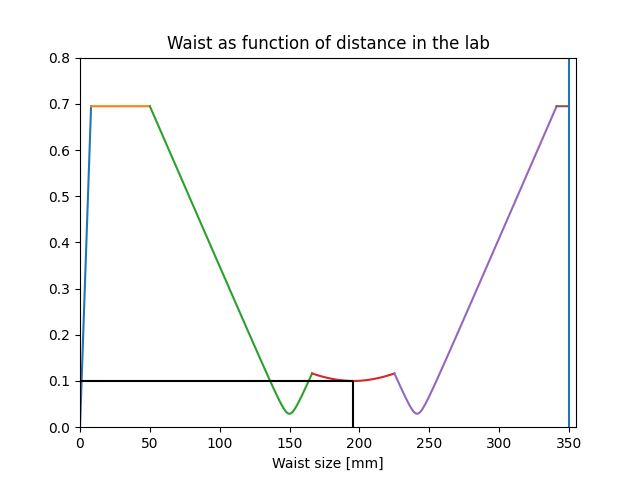

In [153]:
plt.cla()

wvl_mm = 633e-6
MFD = 4.6e-3 # fiber PM-S405-XP
w_0 = MFD/2
zR_0 = np.pi * w_0**2 / wvl_mm
f_col = 7.93
colimator_pos = 7.93
f1 = 100
lens1_pos = 50
f2 = 15
lens2_pos = 166.1
lens3_pos = after_lens2.offset + (after_lens2.offset - lens2_pos)
f3 = f2
lens4_pos = after_lens2.offset + (after_lens2.offset - lens1_pos)
f4 = f1
mirror_pos = 350

lab_before_col = np.linspace(0,colimator_pos,100)
lab_after_col = np.linspace(colimator_pos,lens1_pos,100)
lab_after_lens1 = np.linspace(lens1_pos,lens2_pos,100)
lab_after_lens2 = np.linspace(lens2_pos,lens3_pos,100)
lab_after_lens3 = np.linspace(lens3_pos,lens4_pos,100)
lab_after_lens4 = np.linspace(lens4_pos,mirror_pos,100)


new_beam = Beam(-1j*zR_0)
at_col = propagate(new_beam,colimator_pos)
after_col = lens(at_col, f_col)
at_lens1 = propagate(after_col, lens1_pos - colimator_pos)
after_lens1 = lens(at_lens1, f1)
at_lens2 = propagate(after_lens1, lens2_pos - lens1_pos)
after_lens2 = lens(at_lens2, f2)
at_lens3 = propagate(after_lens2, lens3_pos - lens2_pos)
after_lens3 = lens(at_lens3, f3)
at_lens4 = propagate(after_lens3, lens4_pos - lens3_pos)
after_lens4 = lens(at_lens4, f4)

print(f"w_0 at AOM: {after_lens2.get_minimal_waist()}")
print(f"the AOM is at {after_lens2.offset}")
print(f"lens3 pos is at {lens3_pos}")
print(f"lens4 pos is at {lens4_pos}")

plt.plot(lab_before_col,new_beam.get_waist_z(lab_before_col))
plt.plot(lab_after_col,after_col.get_waist_z(lab_after_col))
plt.plot(lab_after_lens1,after_lens1.get_waist_z(lab_after_lens1))
plt.plot(lab_after_lens2,after_lens2.get_waist_z(lab_after_lens2))
plt.plot(lab_after_lens3,after_lens3.get_waist_z(lab_after_lens3))
plt.plot(lab_after_lens4,after_lens4.get_waist_z(lab_after_lens4))
plt.hlines(0.1,0,after_lens2.offset,'black')
plt.vlines(after_lens2.offset,0,0.1,'black')
plt.axvline(mirror_pos)
plt.ylim([0,0.8])
plt.xlim([0,355])
plt.title("Waist as function of distance in the lab")
plt.xlabel("Distance in the system [mm]")
plt.xlabel("Waist size [mm]")
plt.show()